# Warpping

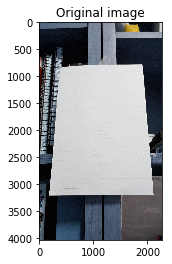

In [28]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

distortion_img = cv2.imread('distortion.jpg')

rows, cols, ch = distortion_img.shape

plt.imshow(distortion_img),plt.title('Original image')
plt.show()

In [2]:
rows

4032

In [3]:
cols

2268

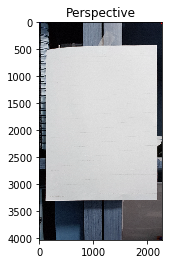

In [34]:
import math

th = math.radians(29)
th2 = math.radians(61)

y = math.tan(th) * rows
h = rows * math.cos(th)
x = rows * math.sin(th)

Upper_DOT11 = x
Upper_DOT12 = rows - h
Upper_DOT21 = cols - x
Upper_DOT22 = rows - h

Under_DOT11 = 0
Under_DOT12 = rows
Under_DOT21 = cols
Under_DOT22 = rows

Upper_DOT11 = np.int32(Upper_DOT11)
Upper_DOT21 = np.int32(Upper_DOT21)
Upper_DOT12 = np.int32(Upper_DOT12)
Upper_DOT22 = np.int32(Upper_DOT22)

# [x,y] 좌표점을 4x2의 행렬로 작성
# 좌표점은 좌상->좌하->우상->우하
pts1 = np.float32([[Upper_DOT21,Upper_DOT22],[Under_DOT11,Under_DOT12],[Upper_DOT11,Upper_DOT12],[Under_DOT21,Under_DOT22]])

# 좌표의 이동점
pts2 = np.float32([[0,0],[0,rows],[cols,0],[cols,rows]])

# pts1의 좌표에 표시. perspective 변환 후 이동 점 확인.
cv2.circle(distortion_img, (Upper_DOT11,Upper_DOT12), 20, (255,0,0),-1)
cv2.circle(distortion_img, (Under_DOT11,Under_DOT12), 20, (0,255,0),-1)
cv2.circle(distortion_img, (Upper_DOT21,Upper_DOT22), 20, (0,0,255),-1)
cv2.circle(distortion_img, (Under_DOT21,Under_DOT22), 20, (0,0,0),-1)

M = cv2.getPerspectiveTransform(pts1, pts2)

dst = cv2.warpPerspective(distortion_img, M, (cols,rows))

plt.imshow(distortion_img),plt.title('Distortion image')
plt.imshow(dst),plt.title('Perspective')
plt.show()

# Calibration

=> Image 여러장을 입력해 카메라 내부 파라미터를 구함

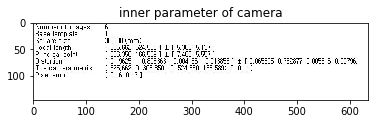

In [10]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread("Calibration/capture.JPG")
plt.imshow(img)
plt.title('inner parameter of camera')
plt.show()

In [1]:
import numpy as np
import cv2

# copy parameters to arrays
K = np.array([[525.662, 0, 306.350], [0, 524.580, 166.589], [0, 0, 1]])
d = np.array([0.196251, -0.803363, 0, -0.004136, -0.013853]) # just use first two terms (no translation)

# read one of your images
img = cv2.imread("folder/sample_cal.jpg")
h, w = img.shape[:2]

# undistort
newcamera, roi = cv2.getOptimalNewCameraMatrix(K, d, (w,h), 0) 
newimg = cv2.undistort(img, K, d, None, newcamera)

cv2.imwrite("folder/original.jpg", img)
cv2.imwrite("folder/undistorted.jpg", newimg)

True

In [ ]:
import numpy as np
import cv2
import glob

# Define the chess board rows and columns
rows = 6
cols = 5

# Set the termination criteria for the corner sub-pixel algorithm
criteria = (cv2.TERM_CRITERIA_MAX_ITER + cv2.TERM_CRITERIA_EPS, 30, 0.001)

# Prepare the object points: (0,0,0), (1,0,0), (2,0,0), ..., (6,5,0). They are the same for all images
objectPoints = np.zeros((rows * cols, 3), np.float32)
objectPoints[:, :2] = np.mgrid[0:rows, 0:cols].T.reshape(-1, 2)

# Create the arrays to store the object points and the image points
objectPointsArray = []
imgPointsArray = []

# Loop over the image files
for path in glob.glob('folder/*.jpg'):
    # Load the image and convert it to gray scale
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (rows, cols), None)

    # Make sure the chess board pattern was found in the image
    if ret:
        # Refine the corner position
        corners = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
        
        # Add the object points and the image points to the arrays
        objectPointsArray.append(objectPoints)
        imgPointsArray.append(corners)

        # Draw the corners on the image
        cv2.drawChessboardCorners(img, (rows, cols), corners, ret)
    
    # Display the image
    #cv2.imshow('chess board', img)
    #cv2.waitKey(500)

# Calibrate the camera and save the results
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objectPointsArray, imgPointsArray, gray.shape[::-1], None, None)
np.savez('calib.npz', mtx=mtx, dist=dist, rvecs=rvecs, tvecs=tvecs)

# Print the camera calibration error
error = 0

for i in range(len(objectPointsArray)):
    imgPoints, _ = cv2.projectPoints(objectPointsArray[i], rvecs[i], tvecs[i], mtx, dist)
    error += cv2.norm(imgPointsArray[i], imgPoints, cv2.NORM_L2) / len(imgPoints)

print("Total error: ", error / len(objectPointsArray))

# Load one of the test images
img = cv2.imread('sample_cal.jpg')
h, w = img.shape[:2]

# Obtain the new camera matrix and undistort the image
newCameraMtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w, h), 1, (w, h))
undistortedImg = cv2.undistort(img, mtx, dist, None, newCameraMtx)

# Crop the undistorted image
# x, y, w, h = roi
# undistortedImg = undistortedImg[y:y + h, x:x + w]

# Display the final result
cv2.imwrite("undistorted.jpg", undistortedImg)

###### calibration result image

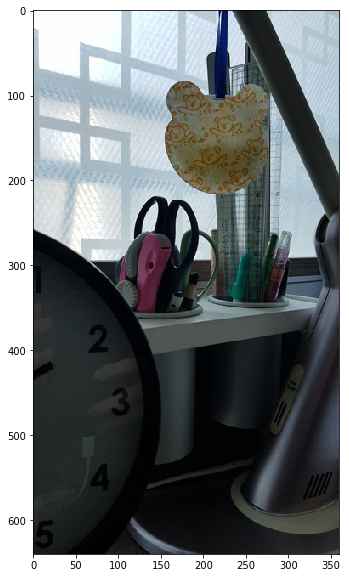

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

distortion_img = cv2.imread('original.jpg')

plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(distortion_img, cv2.COLOR_BGR2RGB))

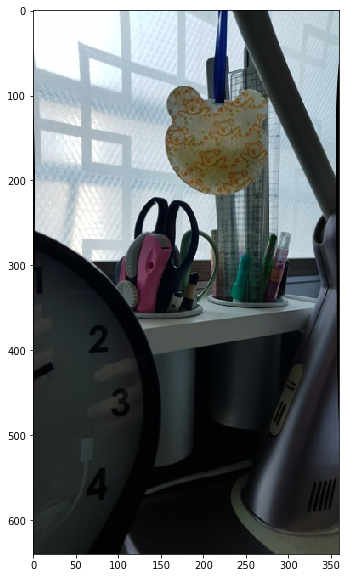

In [5]:
calibration_img = cv2.imread('Undistort.jpg')

plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(calibration_img, cv2.COLOR_BGR2RGB))

=> 중심으로 미세히 볼록했던 이미지의 왜곡이 완화됨